### Importing Necessary packages 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install plotly
!pip install cufflinks 
!pip install textblob

In [3]:
import plotly as py 
import cufflinks as cf 

In [4]:
from plotly.offline import iplot

In [5]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Importing Data

In [7]:
df = pd.read_csv("Motikontho.csv", index_col = 0)
df.head()

,Title,Published Date,Url,Publisher,Category
ID,,,,,
1,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tপ্রতিষ্ঠিত হল “এ...,"September 21, 2016",https://motikontho.wordpress.com/2016/09/21/%e...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি
2,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t১০ টাকা কেজির চা...,"September 4, 2016",https://motikontho.wordpress.com/2016/09/04/%e...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি
3,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকাশিমপুর-২ কারাগ...,"September 3, 2016",https://motikontho.wordpress.com/2016/09/03/%e...,কারাগার মতিবেদক,দেশ-ও-রাজনীতি
4,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকেমনে বুঝব উহা ত...,"August 27, 2016",https://motikontho.wordpress.com/2016/08/27/%e...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি
5,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tমুক্তমনারাও পচা:...,"August 6, 2016",https://motikontho.wordpress.com/2016/08/06/%e...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি


In [8]:
df.drop(labels=['Published Date','Url'], axis=1, inplace = True)

In [9]:
df.head()

,Title,Publisher,Category
ID,,,
1,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tপ্রতিষ্ঠিত হল “এ...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি
2,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\t১০ টাকা কেজির চা...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি
3,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকাশিমপুর-২ কারাগ...,কারাগার মতিবেদক,দেশ-ও-রাজনীতি
4,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকেমনে বুঝব উহা ত...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি
5,\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tমুক্তমনারাও পচা:...,নিজস্ব মতিবেদক,দেশ-ও-রাজনীতি


In [10]:
df.isnull().sum()

Title         0
Publisher    53
Category      0
dtype: int64

In [11]:
df.dropna(subset=['Publisher'], inplace=True)

In [12]:
df.isnull().sum()

Title        0
Publisher    0
Category     0
dtype: int64

In [13]:
' '.join(df['Title'].tolist())

'\n\t\t\t\t\t\t\n\t\t\t\t\t\t\tপ্রতিষ্ঠিত হল “এফএফএফ”\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\t১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের\xa0ক্ষোভ\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝুল” রাখার\xa0আবদার\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকেমনে বুঝব উহা তামিম আছিল:\xa0হান্নান\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tমুক্তমনারাও পচা: আইজিপি\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tমাইলসকে জংগী প্রশিক্ষন দিব:\xa0আনু\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tশেখের বেটীর কারনে সংসারে শান্তি নাই: ঘেঁটুপুত্র\xa0কাদেরা\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tকেমনে বুঝব তারা জঙ্গী আছিল:\xa0হান্নান\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tসরকার বিএনপি শাখাকে যৌন হয়রানী করছে:\xa0ফখা\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tআয় খোকা আয়: জঙ্গী\xa0সঙ্গীত\t\t\t\t\t\t\n\t\t\t\t\t \n\t\t\t\t\t\t\n\t\t\t\t\t\t\tজঙ্গীবাদের পথ থেকে ফ

In [65]:
contractions = {
    '0':'০',
    '1':'১',
    '2':'২',
    '3':'৩',
    '4':'৪',
    '5':'৫',
    '6':'৬',
    '7':'৭',
    '8':'৮',
    '9':'৯',
    '\n':'',
    '\t':'',
    '\xa0':''
}

In [66]:
#removing the '\' signs and converting the numbers into bengali
def cont_to_exp(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
#             print(value)
            x = x.replace(key, value)
        return x
    else:
        return x

In [67]:
cont_to_exp('ঘাঁটি \'ট্রেজার হান্টার\' ')

"ঘাঁটি 'ট্রেজার হান্টার' "

In [68]:
%%time
df['Title'] = df['Title'].apply(lambda x : cont_to_exp(x))

CPU times: user 23 ms, sys: 233 µs, total: 23.3 ms
Wall time: 21 ms


In [69]:
%%time
df['Publisher'] = df['Publisher'].apply(lambda x : cont_to_exp(x))

CPU times: user 13.8 ms, sys: 137 µs, total: 13.9 ms
Wall time: 12.5 ms


In [70]:
df.head(30)

,Title,Publisher,Category,title_polarity,text_polarity,title_len,title_word_count,title_avg_word_len
ID,,,,,,,,
1,প্রতিষ্ঠিত হল “এফএফএফ”,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,22,3,6.666667
2,১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,51,8,5.500000
3,কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝু...,কারাগার প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,59,7,7.571429
4,কেমনে বুঝব উহা তামিম আছিল:হান্নান,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,33,5,5.800000
5,মুক্তমনারাও পচা: আইজিপি,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,23,3,7.000000
6,মাইলসকে জংগী প্রশিক্ষন দিব:আনু,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,30,4,6.750000
7,শেখের বেটীর কারনে সংসারে শান্তি নাই: ঘেঁটুপুত্...,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,53,7,6.714286
8,কেমনে বুঝব তারা জঙ্গী আছিল:হান্নান,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,34,5,6.000000
9,সরকার বিএনপি শাখাকে যৌন হয়রানী করছে:ফখা,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,39,6,5.666667


In [71]:
all_titles = ' '.join(df['Title'].tolist())[0:50000]
print(all_titles)

প্রতিষ্ঠিত হল “এফএফএফ” ১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজেরক্ষোভ কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝুল” রাখারআবদার কেমনে বুঝব উহা তামিম আছিল:হান্নান মুক্তমনারাও পচা: আইজিপি মাইলসকে জংগী প্রশিক্ষন দিব:আনু শেখের বেটীর কারনে সংসারে শান্তি নাই: ঘেঁটুপুত্রকাদেরা কেমনে বুঝব তারা জঙ্গী আছিল:হান্নান সরকার বিএনপি শাখাকে যৌন হয়রানী করছে:ফখা আয় খোকা আয়: জঙ্গীসঙ্গীত জঙ্গীবাদের পথ থেকে ফিরে আসার ঘোষনা দিলেনজাফরুল্লা জন্মেই দেখি ক্ষুব্ধ স্বদেশ ভুমি:ফখা গিয়াসের বাচ্চার কারনে ফাসিয়া গেলুম: নর্থ-সাউথ উপাচার্যআতিকুল আবারও আলাল কেলেংকারীতে বিএনপিশাখা কাঁদলেন এরশাদ ওখালেদা নিজামীর সাটিফিকেটে বানান পরীক্ষা নিয়ে বৃহত্তর জামায়াতেআলচনা টেনশনে আছি: ঘেঁটুপুত্রকাদেরা পাকা পাইখানার মোহ তেগ করে দেশে ফিরায় খালেদাকে বৃহত্তর জামায়াতী বুদ্ধিজীবিদেরঅভিনন্দন তিনি ছিলেন সালাই লামা:বিএনপি সাটিফিকেট চাহিয়া দিষ্টাপ দিবেন না: খন্দকারমাহবুব রায় শুনে পাইজামায় হেগে দিলেন মুজাহিদ ওসাকা তুষারের গোয়েন্দা ততপরতায় আশংকিত ক্ষমতাধরবৃন্দ আপন মুক্তিই এখন মান্নার তামান্না: নাগরিকঐক্য জিহাদী জনের ইন্তেকালে জুনাইদ সংঘের

In [72]:
all_publisher = ' '.join(df['Publisher'].tolist())[0:50000] 
print(all_publisher)

নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক কারাগার প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক খোকা:কাটে না সময় যখন আর কিছুতেNSU-র লেকচারে মন বসে নাহাদিস-কোরানে আমি ঢোকাই মাথামনে হয় আইসিস ডাকছে আমায়আয় খোকা আয়আয় খোকা আয় নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক কারাগার প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক হাটহাজারী আল-প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক জামালপুর মতিনিধি লনডন মতিনিধি নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক দিল্লী মতিনিধি        কাজ চলে যায় যে কোনো ফুটোতেখাপ যদি খায় আকারনামেতে‘ফাকার’ জুড়ে তাইলোকেমওকা পেলেই ডাকার হাটহাজারীস্তান আল-প্রতিবেদক নিউ ইয়র্ক মতিনিধি নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক ক্রীড়া প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক ক্রীড়া প্রতিবেদক নিজস্ব প্রতিবেদক নিজস্ব প্রতিবেদক মানবাধিকার প্রতিবেদক আজ বৃহত্তর জামাতে ইসলামের বিএনপি শাখার একটি প্রেস বি

## Feature Engineering

In [73]:
from textblob import TextBlob

In [74]:
df.head()

,Title,Publisher,Category,title_polarity,text_polarity,title_len,title_word_count,title_avg_word_len
ID,,,,,,,,
1,প্রতিষ্ঠিত হল “এফএফএফ”,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,22,3,6.666667
2,১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,51,8,5.500000
3,কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝু...,কারাগার প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,59,7,7.571429
4,কেমনে বুঝব উহা তামিম আছিল:হান্নান,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,33,5,5.800000
5,মুক্তমনারাও পচা: আইজিপি,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,23,3,7.000000


In [75]:
df['title_polarity'] = df['Title'].apply(lambda x : TextBlob(x).sentiment.polarity) #checking if there is any plarity in the title text

In [76]:
df.head()

,Title,Publisher,Category,title_polarity,text_polarity,title_len,title_word_count,title_avg_word_len
ID,,,,,,,,
1,প্রতিষ্ঠিত হল “এফএফএফ”,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,22,3,6.666667
2,১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,51,8,5.500000
3,কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝু...,কারাগার প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,59,7,7.571429
4,কেমনে বুঝব উহা তামিম আছিল:হান্নান,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,33,5,5.800000
5,মুক্তমনারাও পচা: আইজিপি,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,23,3,7.000000


In [77]:
df['title_polarity'].sum()

0.0

In [78]:
df['title_len'] = df['Title'].apply(lambda x : len(x))  #length of the title

In [79]:
df['title_word_count'] = df['Title'].apply(lambda x : len(x.split()))

In [80]:
def get_avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
        
    return word_len/len(words)

In [81]:
# def get_avg_word_len2(x):
#     def count_chars(a):
#         char_count = len(a)
#         return char_count
    
#     def count_words(b):
#         word_count = b.str.split()
#         return word_count
# #     print(count_chars(x))
# #     print(count_words(x))
#     return (count_chars(x)/count_words(x))
    

In [82]:
df['title_avg_word_len'] = df['Title'].apply(lambda x : get_avg_word_len(x))

In [83]:
# df['text_avg_word_len'] = df['title_bn'].apply(lambda x : get_avg_word_len2(x))

In [84]:
# df.drop(labels=['text_polarity'], axis=1, inplace = True)

In [85]:
df.head()

,Title,Publisher,Category,title_polarity,text_polarity,title_len,title_word_count,title_avg_word_len
ID,,,,,,,,
1,প্রতিষ্ঠিত হল “এফএফএফ”,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,22,3,6.666667
2,১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,51,8,5.500000
3,কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝু...,কারাগার প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,59,7,7.571429
4,কেমনে বুঝব উহা তামিম আছিল:হান্নান,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,33,5,5.800000
5,মুক্তমনারাও পচা: আইজিপি,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,23,3,7.000000


## Distribution and Sentiment Polarity

In [86]:
# df['title_polarity'].iplot(kind='scatter',xTitle = 'count', yTitle= 'polarity',  title = 'Sentiment Polarity Distribution'

In [87]:
df['title_polarity'].iplot(kind='scatter', xTitle = 'count', yTitle= 'polarity',  title = 'Sentiment Polarity Distribution')

In [88]:
df.columns

Index(['Title', 'Publisher', 'Category', 'title_polarity', 'text_polarity',
       'title_len', 'title_word_count', 'title_avg_word_len'],
      dtype='object')

In [89]:
df['Category'].iplot(kind='hist', xTitle='real/fake', yTitle = 'count', title = 'Label Distribution')

In [92]:
df['Category'].iplot(kind='hist', xTitle='Categories', yTitle = 'count', title = 'Type Distribution')

## Distribution of the Title Text Legth and Word Length

In [93]:
df['title_len'].iplot(kind = 'hist',bins = 50,  xTitle = 'title length(chars)', yTitle = 'count', title = 'title length distribution')

In [95]:
df['title_word_count'].iplot(kind = 'hist',  xTitle = 'title word length', yTitle = 'count', title = 'title word count distribution')

In [96]:
df['title_avg_word_len'].iplot(kind = 'hist',bins = 200,  xTitle = 'title avg word length', yTitle = 'count', title = 'Title Average Word length distribution')

## Distribution of Unigram, Bigram and Trigram

### Unigram

In [97]:
from sklearn.feature_extraction.text import CountVectorizer

In [98]:
x = ['আমরা আমাদের আমাদের যথাসাধ্য চেষ্টা করবো করবো করবো']
# x = this is a test example
# unigram = this, is , a , test, example 
# bigram = this is, a test, test example
# trigram = this is a , is a test, a test example

In [99]:
vec = CountVectorizer().fit(x)
bow = vec.transform(x)
bow

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [100]:
sum_words = bow.sum(axis = 0)
sum_words

matrix([[2, 1, 3, 1]])

In [101]:
vec.vocabulary_.items() #it shows the position of words in the sum_words list

dict_items([('আমর', 1), ('আম', 0), ('যথ', 3), ('করব', 2)])

In [108]:
word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
word_freq

[('আমর', 1), ('আম', 2), ('যথ', 1), ('করব', 3)]

In [109]:
words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
words_freq

[('করব', 3), ('আম', 2), ('আমর', 1), ('যথ', 1)]

In [110]:
def top_n_words(x,n):
    vec = CountVectorizer().fit(x)
    bow = vec. transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
    words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]


In [111]:
top_n_words(x,4)

[('করব', 3), ('আম', 2), ('আমর', 1), ('যথ', 1)]

In [112]:
words_title = top_n_words(df['Title'], 20)
words_title

[('আম', 206),
 ('কর', 165),
 ('রত', 135),
 ('নগর', 121),
 ('জন', 119),
 ('করল', 107),
 ('রক', 106),
 ('পর', 106),
 ('ইউন', 76),
 ('হব', 75),
 ('এনপ', 73),
 ('নব', 72),
 ('মত', 71),
 ('মন', 68),
 ('বন', 68),
 ('রস', 65),
 ('তর', 61),
 ('সরক', 57),
 ('হল', 55),
 ('হত', 55)]

In [113]:
words_text = top_n_words(df['Publisher'], 20)
words_text

[('রত', 1549),
 ('দক', 1524),
 ('জস', 1029),
 ('মত', 398),
 ('২০১১', 189),
 ('টন', 93),
 ('০৩', 93),
 ('কর', 90),
 ('উজ', 61),
 ('ডটকম', 58),
 ('আল', 53),
 ('পর', 49),
 ('দন', 45),
 ('অর', 45),
 ('বল', 44),
 ('ইন', 42),
 ('০৪', 42),
 ('লনডন', 38),
 ('ইসল', 38),
 ('থন', 36)]

In [114]:
df1 = pd.DataFrame(words_title, columns = ['Unigram', 'Frequency'])
df2 = pd.DataFrame(words_text, columns = ['Unigram', 'Frequency'])

In [115]:
df1

,Unigram,Frequency
0,আম,206
1,কর,165
2,রত,135
3,নগর,121
4,জন,119
5,করল,107
6,রক,106
7,পর,106
8,ইউন,76
9,হব,75


In [116]:
df1 = df1.set_index('Unigram')
df1.iplot(kind='bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 Unigram Words in Titles' )

In [117]:
df2

,Unigram,Frequency
0,রত,1549
1,দক,1524
2,জস,1029
3,মত,398
4,২০১১,189
5,টন,93
6,০৩,93
7,কর,90
8,উজ,61
9,ডটকম,58


In [118]:
df2 = df2.set_index('Unigram')
df2.iplot(kind='bar', xTitle = 'Unigram', yTitle = 'Count', title = 'Top 20 Unigram Words in Texts' )

### Bigram

In [119]:
def top_n_bigrams(x,n):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(x)
    bow = vec. transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
    words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]


In [120]:
top_n_bigrams(x,5)

[('করব করব', 2), ('আমর আম', 1), ('আম আম', 1), ('আম যথ', 1), ('যথ করব', 1)]

In [121]:
bigram_words_title = top_n_bigrams(df['Title'], 20)
bigram_words_title

[('রওয নব', 28),
 ('রধ নমন', 26),
 ('হত তর', 21),
 ('নব নগর', 19),
 ('পল বন', 16),
 ('রত হল', 15),
 ('আন লন', 13),
 ('জন মদ', 12),
 ('মত কণ', 12),
 ('কম শন', 11),
 ('রক করল', 10),
 ('রওয় নব', 9),
 ('ষন করল', 9),
 ('সম ভব', 9),
 ('সরক এজ', 8),
 ('করল নমত', 8),
 ('আন তর', 8),
 ('করল নইউন', 8),
 ('বস ধর', 8),
 ('চট টগ', 8)]

In [122]:
bigram_words_text = top_n_bigrams(df['Publisher'], 20)
bigram_words_text

[('রত দক', 1522),
 ('জস রত', 1017),
 ('০৩ ২০১১', 88),
 ('টন রত', 72),
 ('মত উজ', 58),
 ('উজ ডটকম', 56),
 ('দন রত', 42),
 ('অর থন', 36),
 ('লনডন মত', 35),
 ('০৪ ২০১১', 35),
 ('থন রত', 34),
 ('মত কণ', 26),
 ('টহ আল', 25),
 ('অনল ইন', 25),
 ('আল রত', 23),
 ('pm bdst', 22),
 ('ওয টন', 19),
 ('চট টগ', 17),
 ('ওয় টন', 15),
 ('আদ লত', 13)]

In [123]:
df3 = pd.DataFrame(bigram_words_title, columns = ['Bigram', 'Frequency'])
df4 = pd.DataFrame(bigram_words_text, columns = ['Bigram', 'Frequency'])

In [124]:
df3 = df3.set_index('Bigram')
df3.iplot(kind='bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 20 Bigram Words in Titles' )

In [125]:
df4 = df4.set_index('Bigram')
df4.iplot(kind='bar', xTitle = 'Bigram', yTitle = 'Count', title = 'Top 20 Bigram Words in Texts' )

### Trigram

In [126]:
def top_n_trigrams(x,n):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(x)
    bow = vec. transform(x)
    sum_words = bow.sum(axis = 0)
    word_freq = [ (word, sum_words[0, indx]) for word, indx in vec.vocabulary_.items()]
    words_freq = sorted(word_freq, key = lambda x : x[1], reverse = True)
    return words_freq[:n]


In [127]:
top_n_trigrams(x,5)

[('আমর আম আম', 1),
 ('আম আম যথ', 1),
 ('আম যথ করব', 1),
 ('যথ করব করব', 1),
 ('করব করব করব', 1)]

In [129]:
trigram_words_title = top_n_trigrams(df['Title'], 20)
trigram_words_title

[('দক রম হব', 7),
 ('সরক এজ ফখ', 7),
 ('করল নব নগর', 6),
 ('গর শক নগর', 6),
 ('খন দক রম', 5),
 ('বস ধর ওক', 5),
 ('ধর ওক রওয', 5),
 ('ওক রওয নব', 5),
 ('নব আনন রহ', 5),
 ('আম লক আশ', 5),
 ('লক আশ রয়', 5),
 ('আশ রয় অস', 5),
 ('রয় অস নল', 5),
 ('রঅভ নন দন', 4),
 ('আসছ ওন সর', 4),
 ('ওন সর বন', 4),
 ('সর বন পন', 4),
 ('বন পন রট', 4),
 ('দন জড় পড়ল', 4),
 ('জড় পড়ল শফ', 4)]

In [130]:
trigram_words_text = top_n_trigrams(df['Publisher'], 100)
trigram_words_text

[('জস রত দক', 1017),
 ('টন রত দক', 72),
 ('মত উজ ডটকম', 56),
 ('দন রত দক', 42),
 ('অর থন রত', 34),
 ('থন রত দক', 34),
 ('টহ আল রত', 23),
 ('আল রত দক', 23),
 ('হত তর ইসল', 11),
 ('ওয টন রত', 10),
 ('আদ লত রত', 9),
 ('লত রত দক', 9),
 ('১৭ ০৩ ২০১১', 9),
 ('ধর রত দক', 8),
 ('তর ইসল এনপ', 7),
 ('ওয় টন রত', 7),
 ('অনল ইন রত', 7),
 ('ইন রত দক', 7),
 ('রত দক ১৬', 7),
 ('১৬ ০৩ ২০১১', 7),
 ('এনপ মহ আম', 6),
 ('ওয় টন মত', 6),
 ('অর রত দক', 6),
 ('রত দক চট', 6),
 ('দক চট টগ', 6),
 ('রত দক ২২', 6),
 ('২৭ ০৩ ২০১১', 6),
 ('২১ ০৩ ২০১১', 6),
 ('১৮ ০৩ ২০১১', 6),
 ('sat mar ১২th', 6),
 ('mar ১২th ২০১১', 6),
 ('নব রত দক', 5),
 ('ইসল এনপ মহ', 5),
 ('ইসল রত দক', 5),
 ('ওয টন মত', 5),
 ('রত দক ১০', 5),
 ('রত দক ২৪', 5),
 ('রত দক ২১', 5),
 ('রত দক ১৮', 5),
 ('১৪ ০৪ ২০১১', 5),
 ('২২ ০৩ ২০১১', 5),
 ('মত ১৭ ০৩', 5),
 ('১৪ ০৩ ২০১১', 5),
 ('১০ ০৩ ২০১১', 5),
 ('১৯ ০৩ ২০১১', 5),
 ('১৫ ০৩ ২০১১', 5),
 ('মহ আম য়ত', 4),
 ('আম য়ত শক', 4),
 ('posted in জন', 4),
 ('চট টগ মত', 4),
 ('রত দক ২৫', 4),
 ('মনল ইন ১৪', 4),
 ('ইন 

In [131]:
df5 = pd.DataFrame(trigram_words_title, columns = ['Trigram', 'Frequency'])
df6 = pd.DataFrame(trigram_words_text, columns = ['Trigram', 'Frequency'])

In [132]:
df5 = df5.set_index('Trigram')
df5.iplot(kind='bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 20 Trigram Words in Titles' )

In [133]:
df6 = df6.set_index('Trigram')
df6.iplot(kind='bar', xTitle = 'Trigram', yTitle = 'Count', title = 'Top 20 Trigram Words in Texts' )

## Distribution of Top 20 Parts of Speech(POS) Tags

In [134]:
!pip install nltk

In [135]:
# !pip install bnltk

In [136]:
# !pip install bnlp_toolkit

In [137]:
import nltk

In [138]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /home/tarequam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tarequam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [139]:
# from bnlp import POS
# bn_pos = POS()
# model_path = "model/bn_pos_model.pkl"
# text = "আমি ভাত খাই।"
# res = bn_pos.tag(model_path, text)
# print(res)

In [140]:
nltk.download('tagsets')

[nltk_data] Downloading package tagsets to /home/tarequam/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [142]:
print(str(df['Title']))

ID
1                                  প্রতিষ্ঠিত হল “এফএফএফ”
2       ১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...
3       কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝু...
4                       কেমনে বুঝব উহা তামিম আছিল:হান্নান
5                                 মুক্তমনারাও পচা: আইজিপি
                              ...                        
2115                               জাপানের পাশে রজনীকান্ত
2116                               পর্যটকদের জাগাতে মমতাজ
2117                           ফারুকীকে নিয়ে ‘তথ্যচিত্র’
2118             ব্যাটম্যান ছবির পরিচালনায় হিমুয়ানআহমেদ
2119                       একই মিউজিক ভিডিওতেশাকিব-শাকিরা
Name: Title, Length: 2066, dtype: object


In [143]:
blob_title = TextBlob(str(df['Title']))
blob_title

TextBlob("ID
1                                  প্রতিষ্ঠিত হল “এফএফএফ”
2       ১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...
3       কাশিমপুর-২ কারাগারের নাম পরিবর্তন করে “কাশেমঝু...
4                       কেমনে বুঝব উহা তামিম আছিল:হান্নান
5                                 মুক্তমনারাও পচা: আইজিপি
                              ...                        
2115                               জাপানের পাশে রজনীকান্ত
2116                               পর্যটকদের জাগাতে মমতাজ
2117                           ফারুকীকে নিয়ে ‘তথ্যচিত্র’
2118             ব্যাটম্যান ছবির পরিচালনায় হিমুয়ানআহমেদ
2119                       একই মিউজিক ভিডিওতেশাকিব-শাকিরা
Name: Title, Length: 2066, dtype: object")

In [144]:
blob_text = TextBlob(str(df['Publisher']))
blob_text

TextBlob("ID
1                                        নিজস্ব প্রতিবেদক
2                                        নিজস্ব প্রতিবেদক
3                                       কারাগার প্রতিবেদক
4                                        নিজস্ব প্রতিবেদক
5                                        নিজস্ব প্রতিবেদক
                              ...                        
2115                                          মতিরং ডেস্ক
2116    এবার গান শুনিয়ে পর্যটকদের জাগাতে এগিয়ে এসেছে...
2117    নাট্য নির্মাতা মোস্তফা সরয়ার ফারুকীর ওপর একটি...
2118                        অনলাইন ডেস্ক। মার্চ ১৫, ২০১১।
2119    জানা গেছে, গালকাটা নাইট রাইডারস দলের নতুন মিউজ...
Name: Publisher, Length: 2066, dtype: object")

In [145]:
print(nltk.help.upenn_tagset())

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [146]:
blob_title.tags

[('ID', 'NNP'),
 ('1', 'CD'),
 ('প্রতিষ্ঠিত', 'NNP'),
 ('হল', 'NNP'),
 ('“', 'NNP'),
 ('এফএফএফ', 'NNP'),
 ('”', 'VBD'),
 ('2', 'CD'),
 ('১০', 'CD'),
 ('টাকা', 'NN'),
 ('কেজির', 'NNP'),
 ('চাল', 'NNP'),
 ('সরবরাহে', 'NNP'),
 ('বিলম্বে', 'NNP'),
 ('সুশীল', 'NNP'),
 ('সমাজের', 'NNP'),
 ('3', 'CD'),
 ('কাশিমপুর-২', 'JJ'),
 ('কারাগারের', 'NNP'),
 ('নাম', 'NNP'),
 ('পরিবর্তন', 'NNP'),
 ('করে', 'NNP'),
 ('“', 'NNP'),
 ('কাশেমঝু', 'NNP'),
 ('4', 'CD'),
 ('কেমনে', 'JJ'),
 ('বুঝব', 'NNP'),
 ('উহা', 'NNP'),
 ('তামিম', 'NNP'),
 ('আছিল', 'NN'),
 ('হান্নান', 'JJ'),
 ('5', 'CD'),
 ('মুক্তমনারাও', 'JJ'),
 ('পচা', 'NN'),
 ('আইজিপি', 'NN'),
 ('2115', 'CD'),
 ('জাপানের', 'NNP'),
 ('পাশে', 'NNP'),
 ('রজনীকান্ত', 'NNP'),
 ('2116', 'CD'),
 ('পর্যটকদের', 'NNP'),
 ('জাগাতে', 'NNP'),
 ('মমতাজ', 'NNP'),
 ('2117', 'CD'),
 ('ফারুকীকে', 'NNP'),
 ('নিয়ে', 'NNP'),
 ('‘', 'NNP'),
 ('তথ্যচিত্র', 'NNP'),
 ('’', 'NNP'),
 ('2118', 'CD'),
 ('ব্যাটম্যান', 'NNP'),
 ('ছবির', 'NNP'),
 ('পরিচালনায়', 'NNP'),
 ('হিমুয়ানআহমেদ'

In [147]:
blob_text.tags

[('ID', 'NNP'),
 ('1', 'CD'),
 ('নিজস্ব', 'NNP'),
 ('প্রতিবেদক', 'VBD'),
 ('2', 'CD'),
 ('নিজস্ব', 'NNP'),
 ('প্রতিবেদক', 'VBD'),
 ('3', 'CD'),
 ('কারাগার', 'NNP'),
 ('প্রতিবেদক', 'VBD'),
 ('4', 'CD'),
 ('নিজস্ব', 'NNP'),
 ('প্রতিবেদক', 'VBD'),
 ('5', 'CD'),
 ('নিজস্ব', 'NN'),
 ('প্রতিবেদক', 'NN'),
 ('2115', 'CD'),
 ('মতিরং', 'NN'),
 ('ডেস্ক', 'NN'),
 ('2116', 'CD'),
 ('এবার', 'NNP'),
 ('গান', 'NNP'),
 ('শুনিয়ে', 'NNP'),
 ('পর্যটকদের', 'NNP'),
 ('জাগাতে', 'NNP'),
 ('এগিয়ে', 'NNP'),
 ('এসেছে', 'NN'),
 ('2117', 'CD'),
 ('নাট্য', 'NNP'),
 ('নির্মাতা', 'NNP'),
 ('মোস্তফা', 'NNP'),
 ('সরয়ার', 'NNP'),
 ('ফারুকীর', 'NNP'),
 ('ওপর', 'NNP'),
 ('একটি', 'NN'),
 ('2118', 'CD'),
 ('অনলাইন', 'NNP'),
 ('ডেস্ক।', 'NNP'),
 ('মার্চ', 'NNP'),
 ('১৫', 'CD'),
 ('২০১১।', 'CD'),
 ('2119', 'CD'),
 ('জানা', 'NN'),
 ('গেছে', 'NNP'),
 ('গালকাটা', 'NNP'),
 ('নাইট', 'NNP'),
 ('রাইডারস', 'NNP'),
 ('দলের', 'NNP'),
 ('নতুন', 'NNP'),
 ('মিউজ', 'NNP'),
 ('Name', 'NN'),
 ('Publisher', 'NN'),
 ('Length', 'NNP'),
 ('20

In [148]:
pos_df_title = pd.DataFrame(blob_title.tags, columns = ['words','pos'])
pos_df_title = pos_df_title['pos'].value_counts()
pos_df_title

NNP    38
CD     12
NN      8
JJ      5
VBD     1
Name: pos, dtype: int64

In [149]:
pos_df_title.iplot(kind = 'bar')

## Bivariate Analysis

In [150]:
df.head(2)

,Title,Publisher,Category,title_polarity,text_polarity,title_len,title_word_count,title_avg_word_len
ID,,,,,,,,
1,প্রতিষ্ঠিত হল “এফএফএফ”,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,22,3,6.666667
2,১০ টাকা কেজির চাল সরবরাহে বিলম্বে সুশীল সমাজের...,নিজস্ব প্রতিবেদক,দেশ-ও-রাজনীতি,0.0,0.0,51,8,5.500000


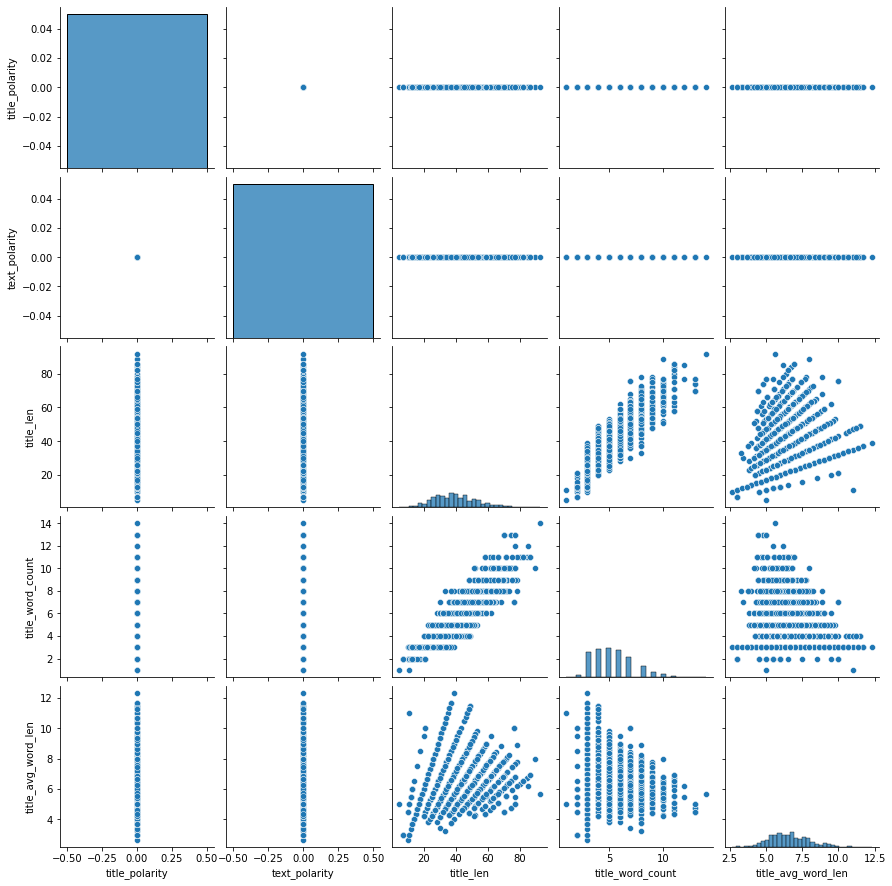

In [151]:
sns.pairplot(df)

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: Us

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/py

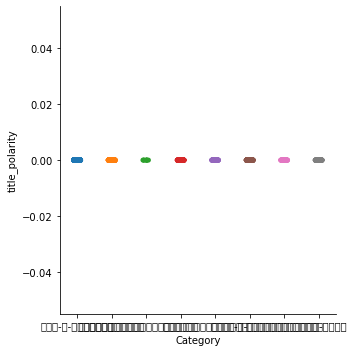

In [159]:
sns.catplot(x = 'Category', y = 'title_polarity', data = df) #swan plot

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: Us

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/py

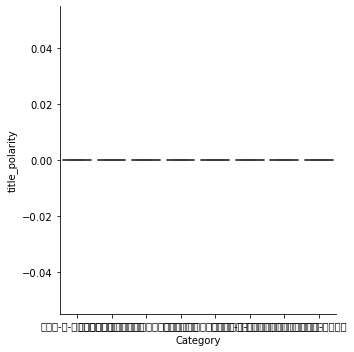

In [160]:
sns.catplot(x = 'Category', y = 'title_polarity', data = df, kind = 'box')

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: Us

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/py

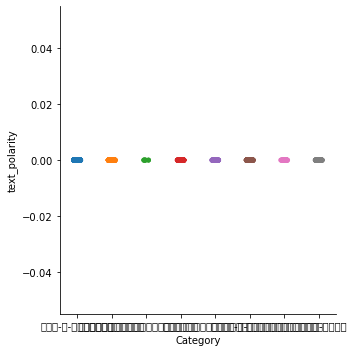

In [161]:
sns.catplot(x = 'Category', y = 'text_polarity', data = df) #swan plot

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:88: Us

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2470 (\N{BENGALI LETTER DA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Matplotlib currently does not support Bengali natively.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2503 (\N{BENGALI VOWEL SIGN E}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2486 (\N{BENGALI LETTER SHA}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2451 (\N{BENGALI LETTER O}) missing from current font.

/home/tarequam/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 2480 (\N{BENGALI LETTER RA}) missing from current font.

/home/tarequam/anaconda3/lib/py

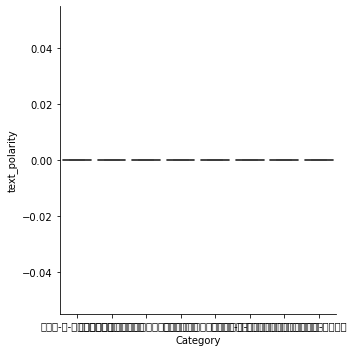

In [162]:
sns.catplot(x = 'Category', y = 'text_polarity', data = df, kind = 'box') #swan plot